# Exploratory Data Analysis

This notebook will contain the preliminary exploratory data analysis in order to determine variables relevant to the business problem and set up for the development of clean regression analysis.

In [1]:
#Import the modules we will likely use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
#Import the dataset
data = pd.read_csv('kc_house_data.csv')

In [7]:
#Preview the dataset (head)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
#Preview the dataset (tail)
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [9]:
#Preview information about the dataset (specifically, column datatypes, column names, check for nulls)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [10]:
#Determine number of observations, number of columns
data.shape

(21597, 21)

## Handling Null Values
In the next several steps, we'll take a closer look at the data and 1) see if there are null values, and 2) decide how we'll handle them relative to the potential business questions.

In [14]:
#Observing the columns, it looks like we may be missing information for year renovated and  waterfront.
#So we'll take a deeper dive to see what the issue is.
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

- Waterfront values have 2376 missing, but the head and tail show that the non-NaN values look like they're all zero, so we'll get some statistical information for that before we handle it. We may probably replace nan values with 0, or eliminate the column entirely.

- Year renovated having 3842 makes intuitive sense - not every house needs to have been renovated. 

- View has 63 null values, so we'll take a peak at that as well.

In [19]:
#See if waterfront values are in fact categorical with just 1s, 0s (And NaNs)
data['waterfront'].unique()

array([nan,  0.,  1.])

In [20]:
data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

Based on the information in the column names descriptions file, it looks like there are 146 properties that have a view of the waterfront. For those marked "NaN", it's a fair assumption to make that if they did have a waterfront it would have been noted, so we'll replace those values with zeros.

In [22]:
#See the type of data that is stored in the "view" column
data['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [23]:
#Count the values of each unique category the view column
data['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Since the columns document tells us that this column is "has been viewed", it looks like the data show us more detail: the number of times the property has been viewed. In this case, it will also make sense to replace any null values in this column with 0. 

- The last series we're going to check is the "year renovated". While it makes sense that not every property might have been renovated, we'll want to check the shape of the data to see if it tells us anything we should keep an eye out for. Perhaps we may end up grouping some of these values together based on how recently they were renovated (e.g.,  0-5 years, 5-10 years). 

- Additionally, it might be worth checking the year that some of the places were built if they have null values. For example, if the house was built in 2019, it probably has not been renovated. Assuming that renovation will have a positive impact on profit from house sale, then we shouldn't discount if the house is newly built. Perhaps in those situations, it might be worth it to replace null values for year renovated with the year built.

In [39]:
#Check year renovated to see overall view of what is in this column
#We make sure to remove 0s for homes that were not renovated
data.loc[data['yr_renovated'] > 0, ['yr_renovated']].describe()

,yr_renovated
count,744.000000
mean,1995.928763
std,15.599946
min,1934.000000
25%,1987.000000
50%,2000.000000
75%,2007.250000
max,2015.000000


In [43]:
# and check for zeros in year renovated...
data.loc[data['yr_renovated'] == 0, ['yr_renovated']].describe()

,yr_renovated
count,17011.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


So based on the information we've just gathered, there are 744 homes which have been renovated, with the earliest year being 1934 and the latest year being 2015. There are 17,011 homes which have the year renovated marked as 0, for which we can presume the house was not renovated. Before deciding how to handle the renovation year data, we'll want to look at the year built column, since the value of these two variables, I believe, will be directly related. Eventually, we may decide on a way to contain these 2 variables into 1, as recent constructions vs. recent renovations, based on personal generalized industry knowledge, might probably have the same impact upon the buyers' decisions and potential profits.

Thinking further, perhaps one of the questions or insights we may be able to provide a client would be to advise whether or not they should renovate their house to increase profits; e.g., houses built before 1995 should be renovated, but renovation on houses built after 1995 has had minimal impact on profit increase. We'll get to that later, but we should save the thought.

In [42]:
data['yr_built'].describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

***This shows that for the 21,597 observations (houses), the dataset shows that all the houses observed were built between 1900 and 2015. So returning to our previous question regarding the renovations vs recently built houses, it looks like some houses were built after other houses were renovated.***

## Formatting Datatypes



After observing the data and addressing the null values, the remaining data will need to be formatted in the most effective way possible for analysis. Specifically, we'll review the datatypes stored in each column.

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We'll make the following modifications:

1. Ensure that date is a date object
2. Convert floors to integer
3. Convert waterfront to boolean true/false
4. Convert year renovated to integer


## Selecting Data

At this moment, we still have 21 columns worth of data. While we *don't* want to wantonly eliminate observations just for the sake of having a clean dataset, we *do* want to eliminate redundancies and streamline the data we're inputting to what we deem to be relevant to the business understanding. 

From a process perspective, it might make sense to group the columns into categories based on the way they might impact the sales profits. The data listed could be summarized based on their impact to sales profits in the following categories:

1. **Location, location, location** (zip code, lat, long, waterfront)
2. **Size** (sqft_living, sqft_lot, sqft_above, sqft_basement, floors; bedrooms, bathrooms)
3. **Age** (yr_built, yr_renovated)
4. **Condition** (condition, grade)



Given the business goal of maximizing profits when selling the home, I would recommend the following:
1. Eliminate the columns sqft_basement and sqft_above since both those data points are captured as a sum in the sqft_living datapoint. From a business perspective, while the difference between where the square footage is located may have an impact on price, I think the relative impact, compared with the other variables, will be insignificant.

2. 



<IPython.core.display.Javascript object>


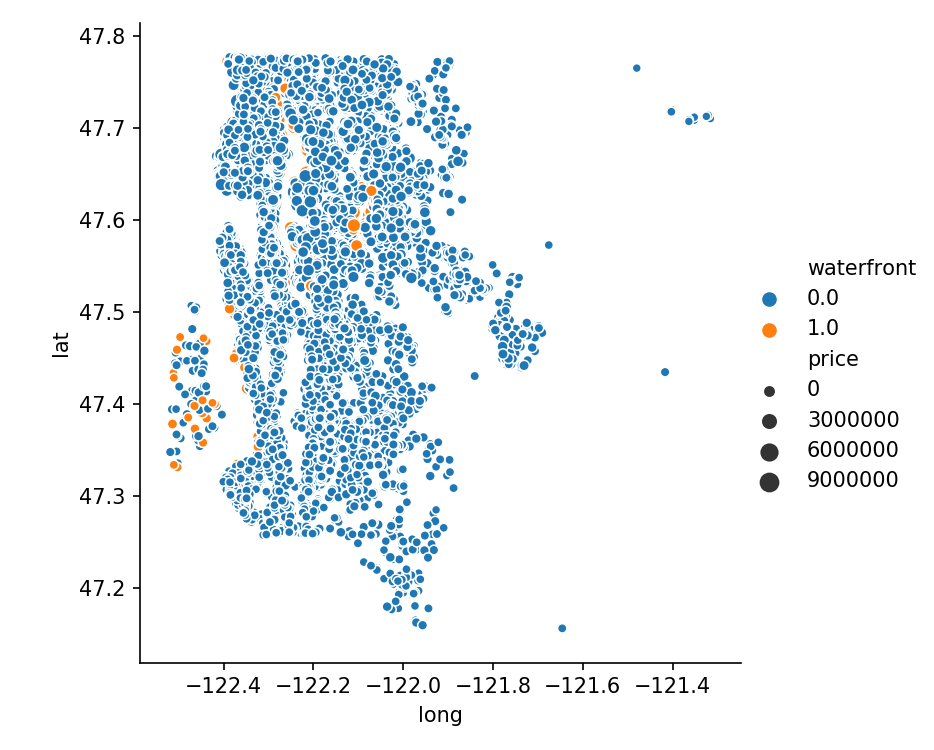

In [51]:
sns.relplot(x='long',y='lat', hue='waterfront', size='price', data=data)

In [52]:
data['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [56]:
data['price'].astype(int).describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64